# Predicting Online Shoppers Purchase Intentions

> #### Sienna Alcala, Mackenzie Hesse, and Sarah Privette

Data Source: http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

***

### Project Purpose

The pandemic has caused many changes in consumer behavior. Customers are utilizing online shopping more than ever, forcing companies to update their platforms to include options such as curbside pick-up and 2-hour delivery. With the changing market businesses need to focus on ways they can increase their e-commerce sales. However, many businesses are faced with limited resources to target efforts at this increased online shopping presence. 

In order to focus on marketing efforts efficiently, we propose the following __solution:__

Use classification algorithms to train machine learning models to predict whether a customer is going to make a purchase. 

__Future use:__
A company could deploy the best performing model on their websites' backend to predict, in real-time, whether a customer is likely to make a purchase. With this information, marketing efforts could be targeted at those shoppers predicted __not__ to make a purchase, preventing the waste of coupons etc. on consumers likely to purchase anyways. 

#### Load Data

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
dataSet = pd.read_csv('online_shoppers_intention.csv')

#### Identify Features & View Data

In [24]:
features = list(dataSet.columns)[:]
print(features)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [25]:
dataSet.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [26]:
dataSet.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Check for Missing Values

In [27]:
dataSet.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Visit Date Analysis

The top 3 months Customers were most likely to make purchases were November, May, and December

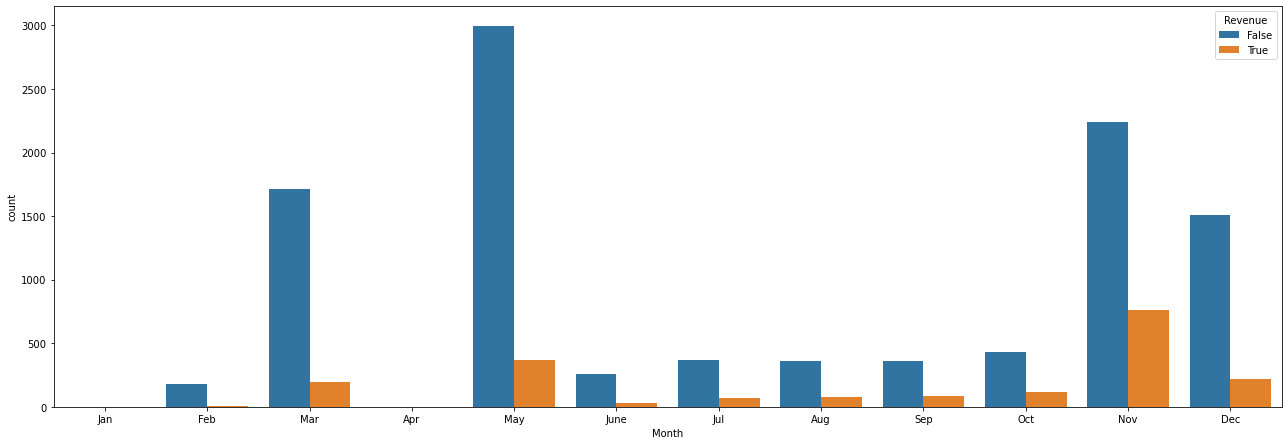

In [28]:
import seaborn as sns
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=dataSet, x='Month', hue='Revenue', ax=ax1, order=orderlist)

plt.tight_layout()
plt.show()

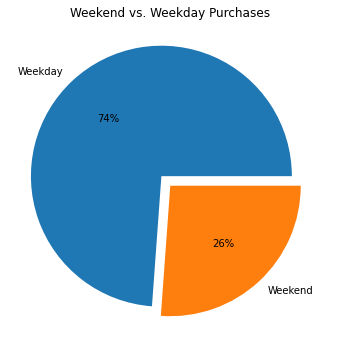

In [29]:
plt.figure(figsize=(12, 6))
plt.pie(dataSet[dataSet['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
plt.title('Weekend vs. Weekday Purchases')
plt.show()

According to the dataset, purchases were more likely to occur on a weekday.

#### Data Pre-Processing

In [30]:
dummiesdf = pd.get_dummies(dataSet['VisitorType'])
dataSet.drop('VisitorType', inplace = True, axis = 1)
dataSet['New_Visitor'] = dummiesdf['New_Visitor']
dataSet['Other'] = dummiesdf['Other']
dataSet['Returning_Visitor'] = dummiesdf['Returning_Visitor']

In [31]:
dfmonth = pd.get_dummies(dataSet['Month']) 
dataSet.drop('Month', inplace = True, axis = 1)

In [32]:
dfOperatingSystems = pd.get_dummies(dataSet['OperatingSystems']) 
dataSet.drop('OperatingSystems', inplace = True, axis = 1)
dfOperatingSystems = dfOperatingSystems.set_axis(['Os1','Os2','Os3','Os4','Os5','Os6','Os7','Os8'], axis=1)

In [33]:
dfBrowser = pd.get_dummies(dataSet['Browser']) 
dataSet.drop('Browser', inplace = True, axis = 1)
dfBrowser = dfBrowser.set_axis(['Browser1','Browser2','Browser3','Browser4','Browser5','Browser6','Browser7','Browser8','Browser9','Browser10','Browser11','Browser12','Browser13'], axis=1)

In [34]:
dfRegion = pd.get_dummies(dataSet['Region']) 
dataSet.drop('Region', inplace = True, axis = 1)
dfRegion = dfRegion.set_axis(['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8','Region9'], axis=1)

In [35]:
dfwithdummies = pd.concat([dataSet,dfmonth,dfOperatingSystems,dfBrowser,dfRegion], axis = 1, sort = False)

In [36]:
dfwithdummies['Class'] = dataSet['Revenue'].astype(int)
dfwithdummies['Weekend'] = dataSet['Weekend'].astype(int)
dfwithdummies.drop('Revenue', axis = 1, inplace = True)
dfcleaned = dfwithdummies.copy()

In [37]:
dfcleaned.to_csv('dfCleaned.csv', index=False)

#### Split Data into Testing and Traininig Sets

In [38]:
y = dfcleaned.Class

In [39]:
x = dfcleaned.drop('Class', axis=1)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 0)

In [41]:
print("shape of original dataset :", dataSet.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (12330, 16)
shape of input - training set (9864, 55)
shape of output - training set (9864,)
shape of input - testing set (2466, 55)
shape of output - testing set (2466,)


#### Linear Model with All Features

In [48]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

model = linear_model.SGDClassifier()
model.fit(x_train, y_train)


SGDClassifier()

In [49]:
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8730738037307381

In [51]:
roc_auc_score(y_test, y_pred)

0.672396842915573

In [53]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.3f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.873
Precision: 0.771
Recall: 0.367
f1_score: 0.498


#### Random Forest with All Features

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred1)

0.8665855636658556

In [60]:
roc_auc_score(y_test, y_pred1)

0.6186515150109905

In [98]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred1)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred1)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred1)))
print('f1_score: {:.3f}'.format(f1_score(y_test, y_pred1)))

Accuracy: 0.867
Precision: 0.919
Recall: 0.242
f1_score: 0.383


#### Finding Important Features

In [62]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(15,'Score'))

                    Feature          Score
5   ProductRelated_Duration  668077.994737
8                PageValues  142864.952465
1   Administrative_Duration   36582.385018
3    Informational_Duration   26542.909331
4            ProductRelated   14849.150604
0            Administrative     932.018678
2             Informational     264.732865
22                      Nov     161.618163
12              New_Visitor     100.004421
9                SpecialDay      47.634419
21                      May      39.871368
27                      Os3      36.760941
20                      Mar      36.135710
6               BounceRates      22.656867
7                 ExitRates      22.448320


In [63]:
from sklearn import svm
list_one =[]
for i, (Score, Feature) in enumerate(zip(bestfeatures.scores_, x.columns)):
    list_one.append((Score, Feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
5,668077.994737,ProductRelated_Duration
8,142864.952465,PageValues
1,36582.385018,Administrative_Duration
3,26542.909331,Informational_Duration
4,14849.150604,ProductRelated
0,932.018678,Administrative
2,264.732865,Informational
22,161.618163,Nov
12,100.004421,New_Visitor
9,47.634419,SpecialDay


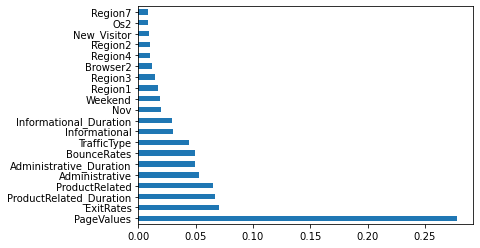

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<AxesSubplot:>

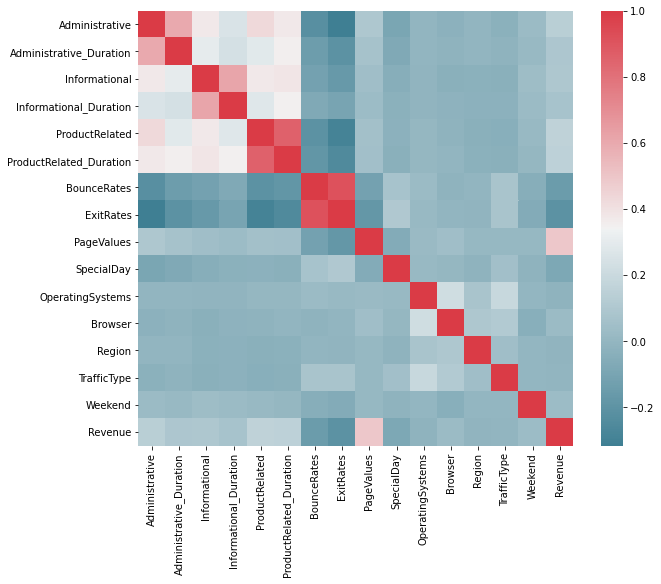

In [65]:
dataset = pd.read_csv('online_shoppers_intention.csv')
f, ax = plt.subplots(figsize=(10,8))
corr = dataset.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype= bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True, ax=ax)

In [68]:
rfc = x_train[['ProductRelated_Duration', 'PageValues', 'ExitRates', 'TrafficType', 'Administrative_Duration', 'Informational_Duration', 'Nov', 'New_Visitor', 'SpecialDay', 'Mar', 'May', 'Os3']].copy()
x_train1, x_test1, y_train1, y_test1 = train_test_split(rfc,y_train,test_size=.2, random_state = 2)

### Models with Feature Selection 

#### Random Forest Classifier

In [73]:
clf1 = RandomForestClassifier(n_estimators= 100, max_depth = 6 )
clf1.fit(x_train1, y_train1)
y_pred2 = clf1.predict(x_test1)

In [96]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test1, y_pred2)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test1, y_pred2)))
print('Precision: {:.3f}'.format(precision_score(y_test1, y_pred2)))
print('Recall: {:.3f}'.format(recall_score(y_test1, y_pred2)))
print('f1_score: {:.3f}'.format(f1_score(y_test1, y_pred2)))

Accuracy: 0.907
ROC AUC: 0.763
Precision: 0.764
Recall: 0.556
f1_score: 0.643


In [99]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#### XGB Classifier

In [84]:
model = GradientBoostingClassifier(n_estimators=150, max_depth=6)
model.fit(x_train1, y_train1)

GradientBoostingClassifier(max_depth=6, n_estimators=150)

In [85]:
y_pred3 = model.predict(x_test1)

In [108]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test1, y_pred3)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test1, y_pred3)))
print('Precision: {:.3f}'.format(precision_score(y_test1, y_pred3)))
print('Recall: {:.3f}'.format(recall_score(y_test1, y_pred3)))
print('f1_score: {:.3f}'.format(f1_score(y_test1, y_pred3)))

Accuracy: 0.901
ROC AUC: 0.767
Precision: 0.710
Recall: 0.576
f1_score: 0.636


#### AdaBoost Classifier

In [101]:
model = AdaBoostClassifier()
model.fit(x_train1, y_train1)

AdaBoostClassifier()

In [104]:
y_pred4 = model.predict(x_test1)

In [109]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test1, y_pred4)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test1, y_pred4)))
print('Precision: {:.3f}'.format(precision_score(y_test1, y_pred4)))
print('Recall: {:.3f}'.format(recall_score(y_test1, y_pred4)))
print('f1_score: {:.3f}'.format(f1_score(y_test1, y_pred4)))

Accuracy: 0.900
ROC AUC: 0.765
Precision: 0.708
Recall: 0.572
f1_score: 0.633


### Conclusion

After testing different classification algorithms we have achieved the best performance using a RandomForest Classifier with Feature Selection.

#### Best Performance:

##### RandomForest Classifier with Feature Selection - 
90.7% Accuracy , ROC AUC 0.76